In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

plt.style.use("seaborn-v0_8")

## Curse of dimensionality 
It refers to the problems associated with multivariate data analysis: for a given sample size, there is a maximum number of features above which the performance of our classifier will degrade rather than improve. In most cases, the extra information that is lost by discarding certain features is compensated by a more accurate mapping into the smaller dimensional space
- Solutions: Add a priori knowledge to weigh more some variables instead of others; Reduce dimensionality by using ***unsupervised*** algorithms

---
### Principal Component Analysis (PCA)
- It's a way to identify patterns in data to reduce the number of dimensions without too much loss of information
- A new space is built by redefining the axes using the Principal Components instead of the original variables.
- Excluding the "non-significant" principal components may filter out the noise that is present in the data
- In principle, the maximum number of PCs that can be calculated is the minimum between the samples and the variables of the dataset
- The number of PCs to keep is the one that preserves at least 95% of the total variance
- The main limitation of PCA is given by the fact that it does not consider the "class separability" since it does not consider the class labels of the samples (unsupervised method)

In [2]:
data = pd.read_csv("datasets/iris.data.txt")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  # last column
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# PCA
# n_components is how many PC keep
pca = PCA(random_state=42)  # , n_components="mle")
pca.fit(X_train)

# Percentage of variance explained by each of the selected components
# The sum needs to be at least 95%, otherwise too much information is lost
print(pca.explained_variance_ratio_)

# Transform data
X_train_t = pca.transform(X_train)
X_test_t = pca.transform(X_test)


# Classification with original data
clf = LogisticRegression(solver="liblinear", random_state=42, max_iter=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy original:", clf.score(X_test, y_test))


# Classification with data transformed with PCA
clf = LogisticRegression(solver="liblinear", random_state=42, max_iter=100)
clf.fit(X_train_t, y_train)
y_pred_t = clf.predict(X_test_t)
print("Accuracy transformed by PCA:", clf.score(X_test_t, y_test))

# Classification with data transformed with PCA and selecting ONLY the most valuable attribute (the first)
col = 0
clf = LogisticRegression(solver="liblinear", random_state=42, max_iter=100)
X_train_t_head = X_train_t[:, col].reshape(-1, 1)
X_test_t_head = X_test_t[:, col].reshape(-1, 1)
clf.fit(X_train_t_head, y_train)
y_pred_t = clf.predict(X_test_t_head)
print("Accuracy transformed by PCA and truncated:", clf.score(X_test_t_head, y_test))

[0.91939858 0.05522612 0.02020546 0.00516984]
Accuracy original: 0.9777777777777777
Accuracy transformed by PCA: 0.9111111111111111
Accuracy transformed by PCA and truncated: 0.8444444444444444


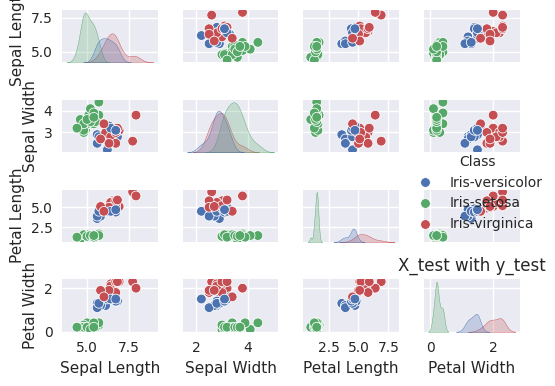

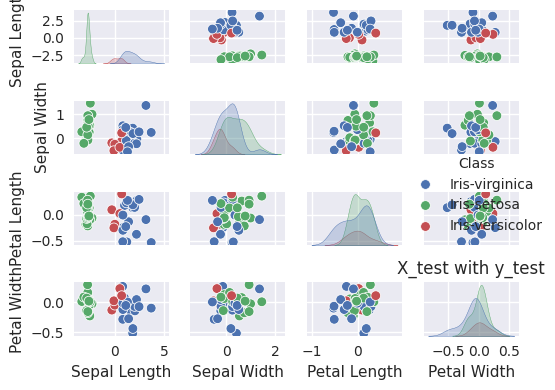

In [3]:
# Actually nothing really useful to display ...
y_pred_df = pd.DataFrame({"Class": y_pred}, index=X_test.index)
sns.pairplot(pd.concat([X_test, y_pred_df], axis=1), height=1, hue="Class")
plt.title("X_test with y_test")
plt.tight_layout()
plt.show()


y_pred_df_t = pd.DataFrame({"Class": y_pred_t}, index=X_test.index)
X_test_df_t = pd.DataFrame(X_test_t, columns=X_test.columns, index=X_test.index)
sns.pairplot(pd.concat([X_test_df_t, y_pred_df_t], axis=1), height=1, hue="Class")
plt.title("X_test with y_test")
plt.tight_layout()
plt.show()

---
### Linear Discriminant Analysis
- Supervised method: considers class separability
- The maximum number of PCs that can be calculated is min(n_classes - 1, n_features)

In [4]:
data = pd.read_csv("datasets/iris.data.txt")
X = data.iloc[:, :-1]
y = data.iloc[:, -1]  # last column
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

lda = LinearDiscriminantAnalysis(solver="eigen")
lda.fit(X_train, y_train)

print(lda.explained_variance_ratio_)

X_train_t = lda.transform(X_train)
X_test_t = lda.transform(X_test)


# Classification with original data
clf = LogisticRegression(solver="liblinear", random_state=42, max_iter=200)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy original:", clf.score(X_test, y_test))


# Classification with data transformed with LDA
clf = LogisticRegression(solver="liblinear", random_state=42, max_iter=200)
clf.fit(X_train_t, y_train)
y_pred_t = clf.predict(X_test_t)
print("Accuracy transformed by LDA:", clf.score(X_test_t, y_test))

# Classification with data transformed with LDA and selecting ONLY the most valuable attribute (the first)
clf = LogisticRegression(solver="liblinear", random_state=42, max_iter=200)
col = 0
X_train_t_head = X_train_t[:, col].reshape(-1, 1)
X_test_t_head = X_test_t[:, col].reshape(-1, 1)
clf.fit(X_train_t_head, y_train)
y_pred_t = clf.predict(X_test_t_head)
print("Accuracy transformed by LDA and truncated:", clf.score(X_test_t_head, y_test))

[0.98925561 0.01074439]
Accuracy original: 0.9777777777777777
Accuracy transformed by LDA: 0.9777777777777777
Accuracy transformed by LDA and truncated: 0.9777777777777777


### t-distributed Stochastic Neighbor Embedding (t-SNE)
- It's a technique for dimensionality reduction that is particularly well-suited for the visualization of high-dimensional datasets
- More info:
• https://lvdmaaten.github.io/tsne/
• https://distill.pub/2016/misread-tsne